<a href="https://colab.research.google.com/github/chaithanyai311/Artificial-Intelligence-mini-project/blob/main/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Building a Sentiment Analysis model without the usage of Lexicons. 
Use traditional Machine Learning algorithms**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv('Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
data.shape

(10261, 9)

In [ ]:
data.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [ ]:
data['reviewText'].fillna('Null', inplace = True)
data.isna().any()

reviewerID        False
asin              False
reviewerName       True
helpful           False
reviewText        False
overall           False
summary           False
unixReviewTime    False
reviewTime        False
dtype: bool

In [ ]:
data['overall'].unique()

array([5., 3., 4., 2., 1.])

In [ ]:
def rating(overall):
    if (int(overall <= 3)):
        return 0
    else:
        return 1
        
data['rating'] = data['overall'].apply(rating)
data = data.drop(['overall'], axis = 1)
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,rating
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",good,1393545600,"02 28, 2014",1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,Jake,1363392000,"03 16, 2013",1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,It Does The Job Well,1377648000,"08 28, 2013",1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,No more pops when I record my vocals.,1392940800,"02 21, 2014",1


In [ ]:
data.rating.unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


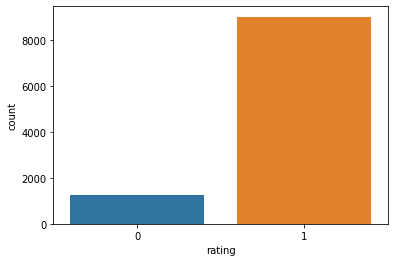

In [ ]:
# Good v/s Bad reviews
# Most of the reviews are good
sns.countplot(data.rating)

In [ ]:
data['reviewText'] = data['reviewText'] + data['summary']
data = data.drop(['summary'], axis = 1)
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,unixReviewTime,reviewTime,rating
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",1393545600,"02 28, 2014",1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,1363392000,"03 16, 2013",1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,1377648000,"08 28, 2013",1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014",1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,1392940800,"02 21, 2014",1


In [ ]:
x = pd.DataFrame(data['reviewText'])
y = pd.DataFrame(data.rating)
data.reviewText = data.reviewText.astype('str')

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nlp = spacy.load("en_core_web_sm")
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
data.reviewText = data.reviewText.apply(furnished)

In [ ]:
data.reviewText.describe()

count                      10261
unique                     10256
top       good stringsfive stars
freq                           3
Name: reviewText, dtype: object

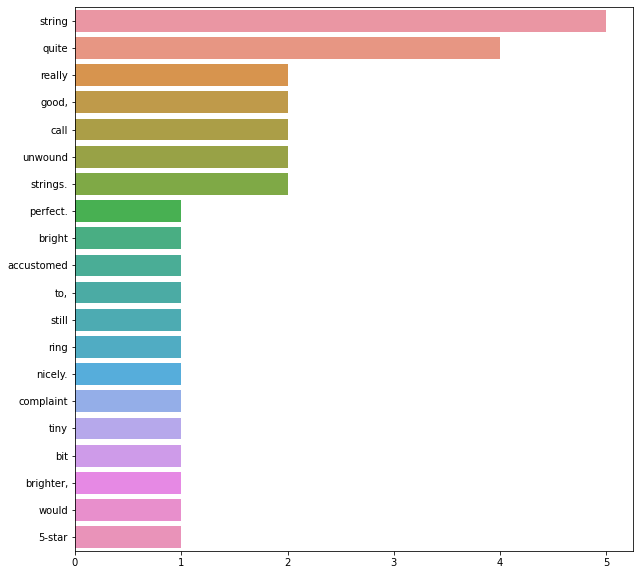

In [ ]:
# Common words
for i in data.reviewText:
    global text
    text = i.split()
    
counter=Counter(text)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize = (10,10))     
sns.barplot(x=y,y=x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data.reviewText,data.rating,test_size = 0.2 , random_state = 0)

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

x_train: (8208, 590454)
x_test: (2053, 590454)


Model Fitting, Prediction and accuracy

In [ ]:
#random forest classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
rf_fit = rf.fit(x_train, y_train)

#predict
rf_predict = rf.predict(x_test)

#accuracy
rf_score = accuracy_score(y_test,rf_predict)

print('random forest classifier accuracy:', rf_score)

random forest classifier accuracy: 0.8889430102289333


In [ ]:
#logistic Regression
lr = LogisticRegression(random_state=0)

#fit
lr_fit = lr.fit(x_train, y_train)

#predict
lr_predict = lr.predict(x_test)

#accuracy
lr_score = accuracy_score(y_test, lr_predict)

print('logistic Regression bow accuracy:', lr_score)

logistic Regression bow accuracy: 0.8899171943497322


In [ ]:
#Linear Support Vector Classifier
ls =  LinearSVC()

#fit
ls_fit= ls.fit(x_train, y_train)

#predict
ls_predict = ls.predict(x_test)

#accuracy
ls_score = accuracy_score(y_test, ls_predict)

print('Linear Support Vector Classifier accuracy:', ls_score)

Linear Support Vector Classifier accuracy: 0.8899171943497322


In [ ]:
data = {'accuracy': [rf_score * 100, lr_score * 100, ls_score*100],
                   'model': ['random forest ','logistic regression ','Linear SVC']}
df = pd.DataFrame(data, columns = ['accuracy', 'model'])
df.head(8)

,accuracy,model
0,88.894301,random forest
1,88.991719,logistic regression
2,88.991719,Linear SVC


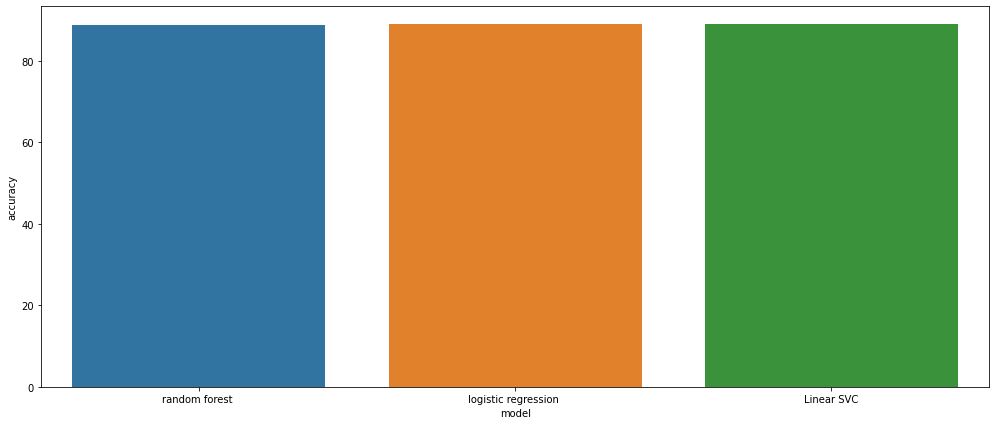

In [ ]:
plt.figure(figsize = (17,7))
sns.barplot(y = df.accuracy, x = df.model)

All three ML models have around the same accuracy of 89%